# Actividad entrenamiento Redes Neuronales (NN)

Jorge Pérez, A01023859

Diego Limón, A01638247

Josue Rodriguez, A01024035

### Useful links:
https://keras.io/getting_started/intro_to_keras_for_engineers/

https://stackoverflow.com/questions/66964492/importerror-cannot-import-name-get-config-from-tensorflow-python-eager-conte

https://keras.io/api/layers/activations/

https://keras.io/api/layers/core_layers/dense/

https://keras.io/api/optimizers/

https://keras.io/api/losses/

https://keras.io/api/models/model_training_apis/

https://www.tensorflow.org/api_docs/python/tf/keras/metrics


In [1]:
# Import libraries
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.utils.random import sample_without_replacement
# models
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# Cross validation
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix

import random
# Keras
# Note: you shall first install tensorflow
from tensorflow import keras
from keras.models import Sequential # Perceptrón multicapa
from keras.layers import Dense      # Capa de neuronas
from keras.utils import np_utils



## Ejercicio 1:

1. Implementa el modelo perceptrón de una neurona para el conjunto de datos misteriosos 1 y evalúa con validación cruzada el rendimiento obtenido con tu modelo. Utiliza como esquema de actualización descenso de gradiente estocástico y utiliza al menos 10 épocas. Para cada época y cada iteración de la validación cruzada, guarda el error de clasificación calculado con los datos de prueba, y grafica al final el error promedio vs la época de tu modelo.

_Recordemos:_ EL modelo perceptrón (una neurona) es un:
* Clasificador de dos clases:
    * Regresa la etiqueta (-1 y 1)
    * Sólo necesita una reurona de salida (2 también es posible)
* Su función de activación es la signo
* Se comporta de manera lineal
* Regla de aprendizaje del perceptrón: 
$$ \overline{\rm W} \Leftarrow \overline{\rm W} + \alpha (y - \widehat{y}) \overline{\rm X} $$

Donde $\alpha$ es el "brinco" de ajuste, $\overline{\rm W}$ es el vector de pesos para la neurona, $y$ la etiqueta y $\overline{\rm X}$ una observación. 

Nuestro vector de pesos siempre tiene un _bias_, este es un valor que no está mapeado a un input directamente, se suele dejar 1 como su valor. TODO: preguntar a qué se se debía

Nota: Si los datos *NO* son linealmente separables, el modelo nuca convergerá, y por lo tanto los pesos nunca estarán fijos.

* **Lote: (batch)** cada actualización del modelo.
* **Época: (epoch)** cada iteración con todos los datos de entrenamiento. (Pq se puede entrenar con los mismos múltiples veces cuando se ordenan aleatoriamente)


In [41]:
def getAcc(realVals, predicted):
    correctCount = 0
    for i in range(len(realVals)):
        if realVals[i] == predicted[i]:
            correctCount += 1
    return correctCount/len(realVals)

def graphModel(model, x, y, splits = 10):
    accHistorical = []

    # Crear modelo Kfold
    kf = StratifiedKFold(n_splits = splits, shuffle = True)
    
    acc = 0
    recall = np.array([0., 0., 0.])
    precision = np.array([0., 0., 0.])

    # Iterar sobre todas las segmentaciones del KFold
    for train_index, test_index in kf.split(x, y):
        
        # Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]

        model.fit(x_train, y_train, epochs=20, batch_size=20) # 3 is an arbitrary number

        # Test phase
        x_test = x[test_index, :]
        y_test = y[test_index]
        y_pred = clf.predict(x_test)

        # For a cleaner output
        y_pred = np.around(y_pred)

        # Calculate model performance
        # print(y_test)
        # print("====")
        # print(y_pred)

        accHistorical.append(getAcc(y_test, y_pred))

    # Print results
    acc = np.average(accHistorical)
    print('Acc: ', acc)
    print("=========================================")

    print("==== Accuracy ====")
    # Graph
    # Plot the training points
    plt.figure(1, figsize=(8, 6))
    plt.clf()

    plt.scatter( list(range(splits)), accHistorical, cmap=plt.cm.Set1, edgecolor="k")
    plt.xlabel("# batch")
    plt.ylabel("Accuracy")
    print("The max is: ", max(accHistorical))

(528, 9)
(528,)
Epoch 1/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.5347
Epoch 2/20
24/24 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.5389
Epoch 3/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.5474
Epoch 4/20
24/24 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.5516
Epoch 5/20
24/24 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.5579
Epoch 6/20
24/24 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.5558
Epoch 7/20
24/24 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.5558
Epoch 8/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.5600
Epoch 9/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.5621
Epoch 10/20
24/24 [==============================] - 0s 1ms/step -

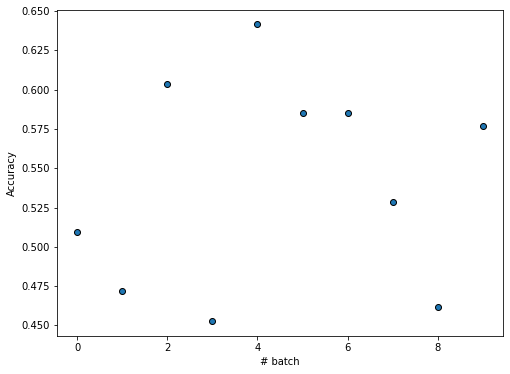

In [42]:
data = np.loadtxt("./data/misterious_data_1.txt")

# Extract features, but not all of them
x_data = data[:,1:10]
nFeatures =  len(x_data[0])
# Extract labels
y_data = data[:,0]

# Reorder labels to make them tensorflow consumable
    # We do this manually, since the default (np_utils.to_categorical)
    # Was not identifying between 1 and -1
labels = [1 if d == 1 else 0 for d in y_data]
# Convert yo numpyArray
labels = np.array(labels)

#print(y_data)
print("=======")
#print(labels)

# Define MLP model
clf = Sequential()
    # Add 1 layer composed of:
        # 1 Neuron, nFeatures
        # Linear activation, tho I'm not sure if it sould be sign | sign == sigmoid?
        # From what I've read, it should be sigmoid, since we have a clas 
        # identifier, and the output is one class or the other
clf.add(Dense(1, input_dim= nFeatures, activation = 'sigmoid')) 

# Compile model
    # We define the loss function: categorical_crossentropy (usually used for classes)
    # Optimizer (Adam, modern stochastic gradient descent)
clf.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(x_data.shape)
print(labels.shape)

# Cross-validate the model:
graphModel(clf, x_data, labels)


2. Repite el paso anterior pero con descenso de gradiente de lote y descenso de gradiente de mini-lote.

3. Repite todo lo anterior, pero utilizando la regla de aprendizaje para el modelo SVM con una neurona. 
